# To Predict the percentage of a student's marks based on no of hours of study

In [2]:
#importing libraries for necessary tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading and reading the data 
data=pd.read_csv("C:/Users/Akshara/Desktop/data1.csv")
data

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# checking the number of rows and columns 
data.shape

(25, 2)

In [6]:
# to check the first five rows of the dataset
data.head()

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
# to check basic details of the dataset
data.describe()

,hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# to check if there are missing values in the dataset
data.isnull().sum()

hours     0
scores    0
dtype: int64

In [9]:
# to check correlation
data.corr()

,hours,scores
hours,1.000000,0.976191
scores,0.976191,1.000000


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

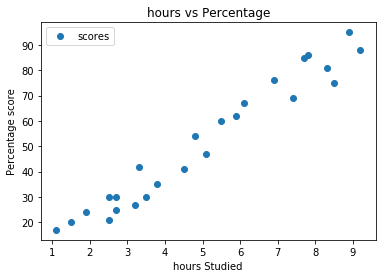

In [14]:
# checking how the data looks in a graph for linear regression
data.plot(x='hours ', y='scores', style='o')
plt.title('hours vs Percentage')
plt.xlabel('hours Studied')
plt.ylabel('Percentage score')
plt.show()

In [15]:
# preparing the dataset, dependent and independent variables 
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [16]:
# split the dataset into train and test, here 0.2 means 20% is used. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# linear regression 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# expected mean of Y when x= 0 
print(regressor.intercept_) 

2.018160041434683


In [19]:
# the mean change if one unit value changes
print(regressor.coef_)

[9.91065648]


In [20]:
y_pred = regressor.predict(X_test)

In [28]:
#comparing actual vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
# evaluating the model 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [24]:
#What will be predicted score if a student studies for  9.25 hrs/ day?
# if a student studies one hour more than they previously studied for an exam, 
#they can expect to achieve an increase of 9.91% in the score achieved by the student previously.
hours = 9.25
own_pred = round(regressor.predict([[9.25]])[0],2)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = 9.25
Predicted Score = 93.69


thank you